<a href="https://colab.research.google.com/github/halaalduh/Diabetes-Prediction-using-Healthcare-Dataset/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Problem**

The project aims to analyze a healthcare dataset on diabetes and use data mining techniques to predict whether a patient is diabetic or not based on clinical measurements such as age, glucose, BMI, and insulin.

This is important because early detection of diabetes can reduce complications, improve quality of life, and support preventive healthcare. The project also seeks to uncover patterns in patient data using classification and clustering methods.


#**2. Data Mining Task**
This project involves two types of data mining tasks:

1. Classification
Predicting the diabetes status of a patient (Outcome = 0 or 1) using labeled medical data.
Goal: build a model that can classify patients as diabetic vs. non-diabetic.

2. Clustering
Grouping patients based on similarities in their medical attributes without using the class label.
Goal: discover natural health profiles, potential risk groups, and hidden patterns.


# **3. Data**

The dataset used in this project is the **Healthcare Diabetes Dataset**. It contains medical information about patients, with the goal of predicting whether an individual has diabetes based on several health-related attributes.

### **Dataset Description**


Source: Kaggle – Healthcare Diabetes Dataset

Records (rows): 2768

Attributes (columns):10

Class label: Outcome (0 = non-diabetic, 1 = diabetic)

The attributes include:

Id

Pregnancies

Glucose

BloodPressure

SkinThickness

Insulin

BMI

DiabetesPedigreeFunction

Age

Outcom

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step A: Load dataset
file_path = '/content/Healthcare-Diabetes.csv'
df = pd.read_csv(file_path)
print("Dataset loaded successfully.\n")


Dataset loaded successfully.



**Dataset Overview**





In [8]:
print("\nAttributes and Data Types:")
print(df.dtypes)



Attributes and Data Types:
Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [9]:
num_attributes = len(df.columns)
print("Number of attributes:", num_attributes)

Number of attributes: 10


In [10]:
num_records = len(df)
print("Number of records:", num_records)

Number of records: 2768


In [11]:
print("\nCount of instances for each label (Outcome):")
print(df['Outcome'].value_counts())


Count of instances for each label (Outcome):
Outcome
0    1816
1     952
Name: count, dtype: int64


In [12]:
print("\nSample of the dataset:")
print(df.head())


Sample of the dataset:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Missing values**


In [13]:
# Missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Summarie Mssing Vales**


In [14]:

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_df)



Missing Values Summary:
                          Missing Count  Missing Percent
Id                                    0              0.0
Pregnancies                           0              0.0
Glucose                               0              0.0
BloodPressure                         0              0.0
SkinThickness                         0              0.0
Insulin                               0              0.0
BMI                                   0              0.0
DiabetesPedigreeFunction              0              0.0
Age                                   0              0.0
Outcome                               0              0.0


**Five Number Summary**


In [15]:
#Five Number Summary
print("Five Number Summary:")
# Define numeric_cols by selecting all numeric columns and dropping 'Id' and 'Outcome'
numeric_cols = df.select_dtypes(include=np.number).columns.drop(['Id', 'Outcome'], errors='ignore')
five_num_summary = df[numeric_cols].describe().loc[['min','25%','50%','75%','max']]
print(five_num_summary)

Five Number Summary:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
min          0.0      0.0            0.0            0.0      0.0   0.000   
25%          1.0     99.0           62.0            0.0      0.0  27.300   
50%          3.0    117.0           72.0           23.0     37.0  32.200   
75%          6.0    141.0           80.0           32.0    130.0  36.625   
max         17.0    199.0          122.0          110.0    846.0  80.600   

     DiabetesPedigreeFunction   Age  
min                     0.078  21.0  
25%                     0.244  24.0  
50%                     0.375  29.0  
75%                     0.624  40.0  
max                     2.420  81.0  


**Statistical summary**


In [16]:
#Statistical summary
print("Statistical Summary:")
statistical_summary = df[numeric_cols].describe()
print(statistical_summary)

Statistical Summary:
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890   
std       3.323801    32.036508      19.231438      16.059596   112.301933   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age  
count  2768.000000               2768.000000  2768.000000  
mean     32.137392                  0.471193    33.132225  
std       8.076127                  0.325669    11.777230  
min       0.000000                  

**Visualizations**


 **1. Boxplots**

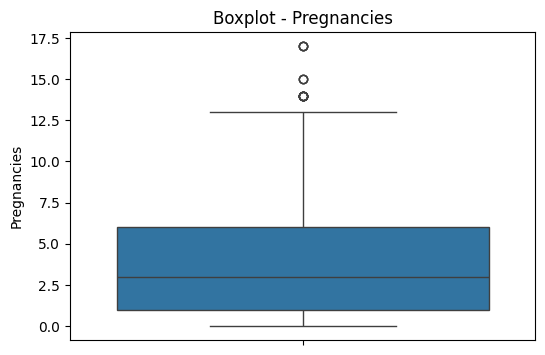

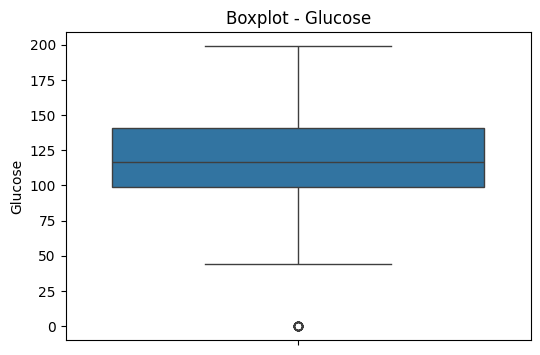

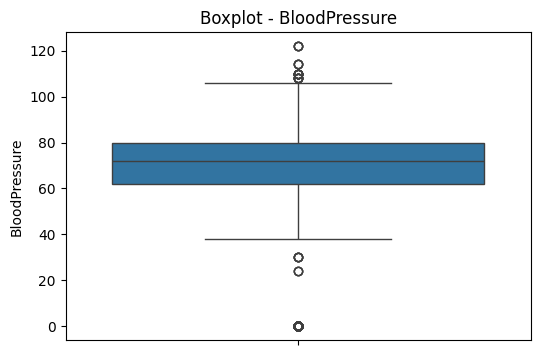

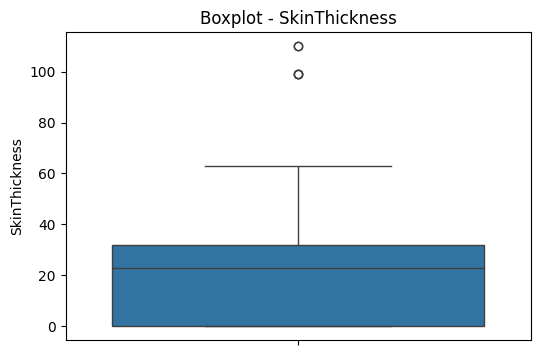

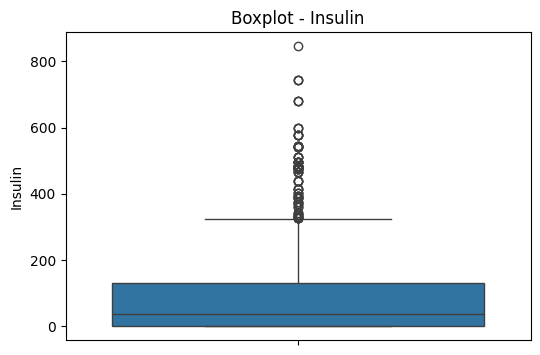

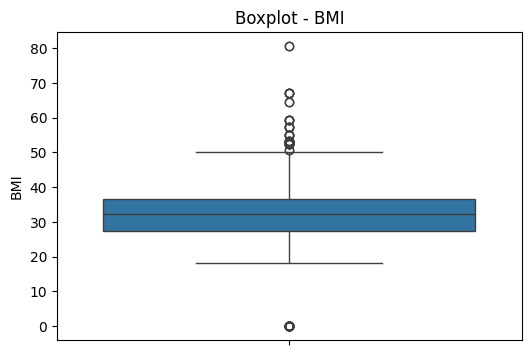

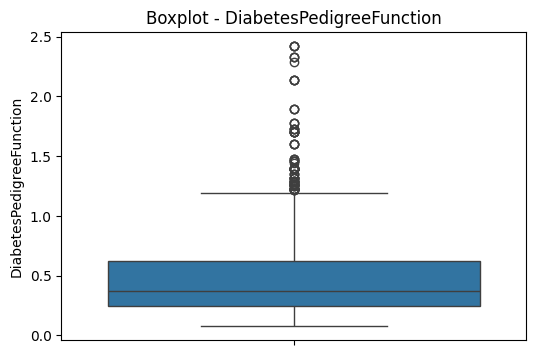

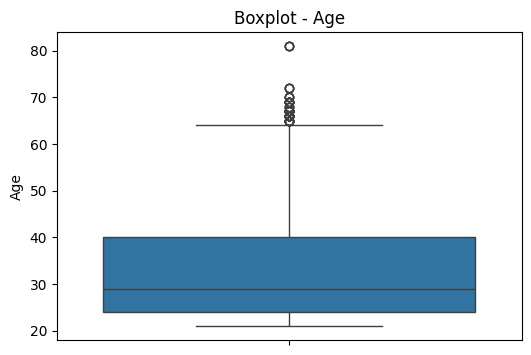

In [17]:

# Visualizations
# 1. Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

**2. Histograms**

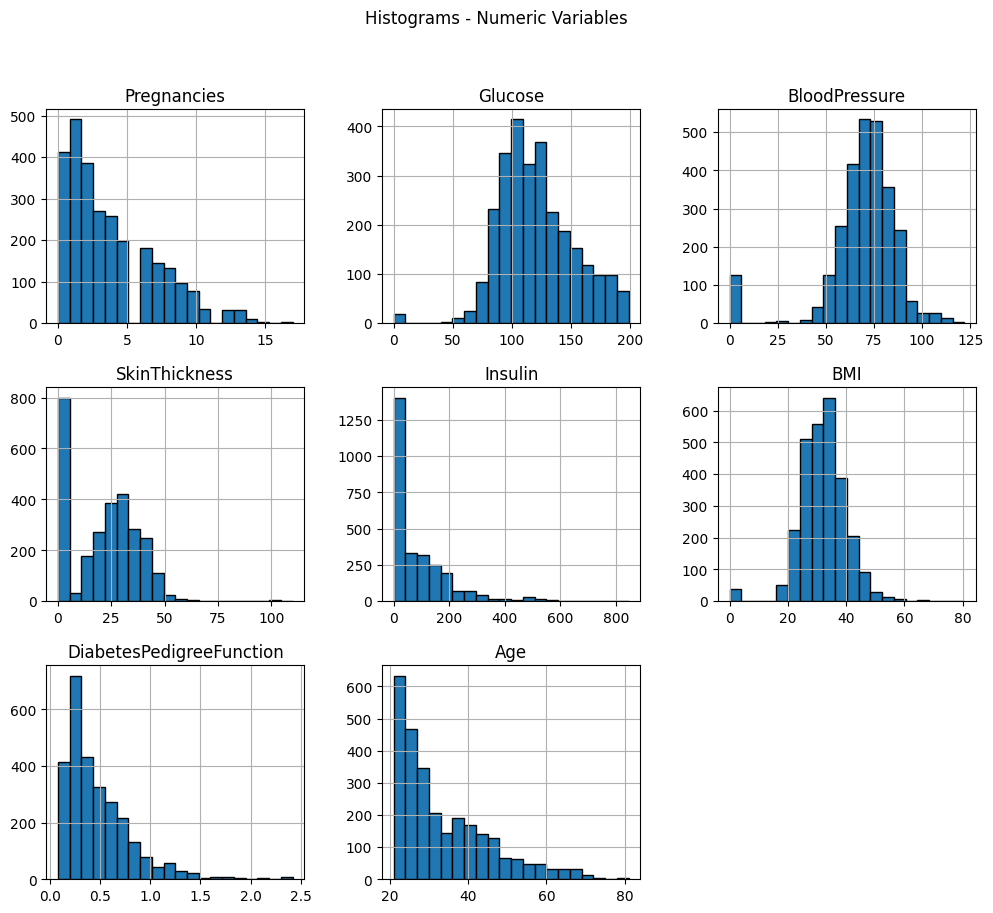

In [18]:

# 2. Histograms
df[numeric_cols].hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Histograms - Numeric Variables")
plt.show()

**3. Scatter plot: Age vs Glucose**

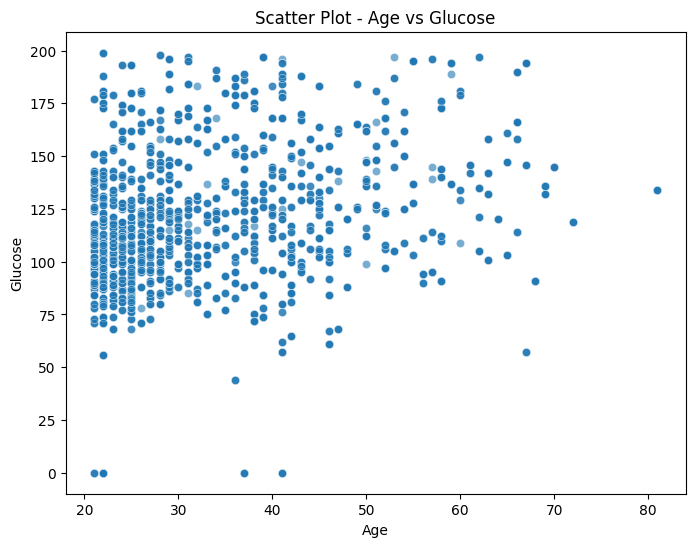

In [19]:

# 3. Scatter plot: Age vs Glucose
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Glucose', data=df, alpha=0.6)
plt.title('Scatter Plot - Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

**4. Bar plot: Outcome**

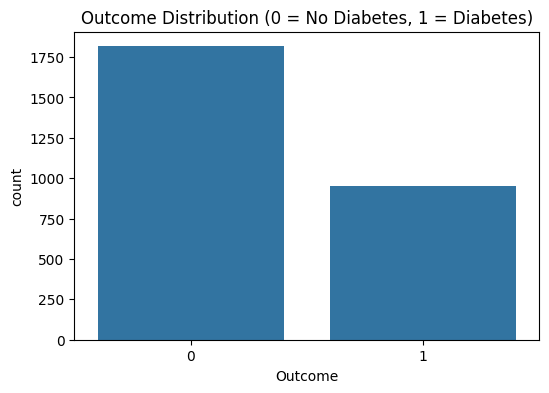

In [20]:
# 4. Bar plot: Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.show()

Concluding Observations from the Plots and Data Exploration:

Outliers are present in Glucose, Insulin, and BMI, which could affect model performance if not treated.

The Outcome variable is imbalanced, with more non-diabetic (0) cases than diabetic (1) cases.

Scatter plots like Age vs Glucose show variability but no clear linear trend; further analysis may reveal important relationships.

Numeric variables such as BloodPressure and DiabetesPedigreeFunction have wide ranges, indicating the need for normalization.

Handling missing values, treating outliers, discretizing key features, and normalizing numeric variables are essential preprocessing steps to improve model quality and performance


# **4.Data preprocessing**



---

**Data Preprocessing Overview**

Data preprocessing is a crucial step in machine learning as it ensures that the dataset is clean, consistent, and ready for model training. Raw data may contain issues such as missing values, outliers, categorical variables, and features with different scales, all of which can negatively impact the performance of machine learning models.

In our case, the Healthcare Diabetes dataset has several potential issues that need preprocessing, including:

* Missing values in numerical columns such as Glucose, BloodPressure, BMI, Insulin, and SkinThickness.
* Outliers in numeric features like Insulin, Glucose, BMI, and DiabetesPedigreeFunction that could distort statistical analyses.
* Numerical features with different ranges that need normalization to ensure equal influence on machine learning models.

We addressed these issues using the following techniques:

1. **Handling Missing Values:** Replaced missing or zero values in numeric columns with mean or median to prevent model bias.
2. **Outlier Detection & Capping:** Detected outliers using the IQR method and capped extreme values to reduce their impact.
3. **Discretization:** Converted continuous variables like Age and Glucose into categories to improve interpretability.
4. **Normalization (Min-Max Scaling):** Scaled numeric features to the range [0, 1] to ensure all features contribute equally during modeling.
5. **Noise Reduction:** Applied rolling mean smoothing on Glucose, BloodPressure, and BMI to reduce random fluctuations and clarify patterns.





#snapshot for raw dataset


In [21]:
#snapshot for raw dataset
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


**Handling Missing Values**

Replaced zeros in Glucose, BloodPressure, SkinThickness, Insulin, BMI with NaN, then filled missing values using mean or median.This improved data accuracy by removing unrealistic zeros and completing missing records.




In [22]:
# Columns where zero is invalid
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

# Check missing values again
df.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,18
BloodPressure,125
SkinThickness,800
Insulin,1330
BMI,39
DiabetesPedigreeFunction,0
Age,0
Outcome,0


 **Handling Outlier**


Detected and handled outliers in numeric columns using the IQR (Interquartile Range) method. Extreme values in attributes like Insulin and DiabetesPedigreeFunction were capped within acceptable limits. This step reduced the effect of extreme values and made the data distribution more balanced and reliable.

In [23]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return np.where(series < lower, lower, np.where(series > upper, upper, series))

df['Insulin'] = cap_outliers(df['Insulin'])
df['DiabetesPedigreeFunction'] = cap_outliers(df['DiabetesPedigreeFunction'])

**Noise Removal**


Used a moving average smoothing method to reduce random fluctuations in numeric features.This step helped remove noise and made data patterns clearer.

In [24]:
# Noise removal using rolling mean (smoothing)
for col in ['Glucose', 'BloodPressure', 'BMI']:
    df[col] = df[col].rolling(window=3, min_periods=1).mean()

df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148.000000,72.000000,35.0,NaN,33.600000,0.627,50,1
1,2,1,116.500000,69.000000,29.0,NaN,30.100000,0.351,31,0
2,3,8,138.666667,67.333333,NaN,NaN,27.833333,0.672,32,1
3,4,1,119.000000,65.333333,23.0,94.0,26.000000,0.167,21,0
4,5,0,136.333333,56.666667,35.0,168.0,31.500000,1.194,33,1






**Discretization**


Converted continuous values into categories for better interpretability. Age was grouped into ranges (20–29, 30–39, etc.), and Glucose was classified as Normal, Prediabetes, or Diabetes. This helps algorithms identify patterns more effectively.

In [25]:
# Discretization (Binning)
# Discretize Age into categories
df['Age_Bin'] = pd.cut(df['Age'],
                       bins=[20, 30, 40, 50, 60, 80],
                       labels=["20-29","30-39","40-49","50-59","60+"])

# Discretize Glucose into categories
df['Glucose_Bin'] = pd.cut(df['Glucose'],
                           bins=[0, 99, 125, 200],
                           labels=["Normal","Prediabetes","Diabetes"])

# Show first rows with new bins
df[['Age', 'Age_Bin', 'Glucose', 'Glucose_Bin']].head()

,Age,Age_Bin,Glucose,Glucose_Bin
0,50,40-49,148.000000,Diabetes
1,31,30-39,116.500000,Prediabetes
2,32,30-39,138.666667,Diabetes
3,21,20-29,119.000000,Prediabetes
4,33,30-39,136.333333,Diabetes


**Normalization & Snapsot of preorcessed dataset**


Applied MinMaxScaler to scale numeric values between 0 and 1.This ensured that all attributes have equal influence on the models.

In [26]:
# Drop Id column (not useful)
df = df.drop(columns=['Id'])

# Apply Min-Max Normalization [0,1] only to numeric columns
scaler = MinMaxScaler()

# Select only numeric columns
num_cols = df.select_dtypes(include=[np.number]).drop(columns=['Outcome']).columns

**snapsot of preorcessed dataset**

In [27]:
#snapsot of preorcessed dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Bin,Glucose_Bin
0,6,148.000000,72.000000,35.0,NaN,33.600000,0.627,50,1,40-49,Diabetes
1,1,116.500000,69.000000,29.0,NaN,30.100000,0.351,31,0,30-39,Prediabetes
2,8,138.666667,67.333333,NaN,NaN,27.833333,0.672,32,1,30-39,Diabetes
3,1,119.000000,65.333333,23.0,94.0,26.000000,0.167,21,0,20-29,Prediabetes
4,0,136.333333,56.666667,35.0,168.0,31.500000,1.194,33,1,30-39,Diabetes


#**Save preprocessed dataset**

In [28]:
# Save preprocessed dataset
df.to_csv("Preprocessed_dataset.csv", index=False)
print("Preprocessed dataset saved as Preprocessed_dataset.csv")

Preprocessed dataset saved as Preprocessed_dataset.csv





# **5. Data Mining Technique**


## **1. Clustering**

In this project, the data mining technique used is **Clustering**, specifically the **K-Means** algorithm. It was selected to identify natural groups in the dataset based on the features **Glucose** and **BMI**, which help distinguish different health-risk levels.

### **Why K-Means?**

* Efficient and widely used for numerical data.
* Groups data based on similarity.
* Allows testing multiple K values as required.
* Suitable for continuous features like Glucose and BMI.

### **How It Was Applied**

Python was used with the following packages:

* **pandas** for loading and preparing data
* **numpy** for numerical operations
* **matplotlib** for visualizing clusters
* **scikit-learn** for applying K-Means and evaluation

**Methods Used:**

* **`KMeans`** (from `sklearn.cluster`) to build and fit the clustering model

  * Parameters: `n_clusters`, `init='k-means++'`, `random_state=0`
* **`silhouette_score`** (from `sklearn.metrics`) to measure cluster quality
* **Elbow Method (WCSS)** using `kmeans.inertia_` to determine optimal K
* **Scatter plots** to visualize clusters and centroids


---


## **2. Classification**

In this project, the data mining technique used is **Classification**, specifically the **Decision Tree Classifier**. It was selected to predict class labels based on the dataset features and to compare performance using different criteria (Gini and Entropy) and different train–test split ratios,, making decisions simple to interpret and visualize.



## **Why Decision Trees?**

* Simple and easy to interpret.
* Do not require feature scaling or complex preprocessing.
* Handle both numerical and categorical data.
* Allow comparing different splitting criteria (Gini vs. Entropy).
* Provide visual tree structures that make decision rules clear.



## **How It Was Applied**

Python was used with the following packages:

* **pandas :**  loading and preparing the dataset
* **numpy :**  numerical operations
* **matplotlib :**  visualizing confusion matrices and decision trees
* **sklearn.model_selection.train_test_split :**  create train/test partitions
* **sklearn.tree.DecisionTreeClassifier :** build and train the classifier
* **sklearn.metrics :** evaluate accuracy and build confusion matrices


## **Methods Used**

### **Train–Test Splitting**

* `train_test_split` (from `sklearn.model_selection`)
* Applied with **stratify=y** to keep class distribution balanced
* Tested three ratios: **80/20**, **70/30**, **60/40**

### **Decision Tree Model**

* `DecisionTreeClassifier` (from `sklearn.tree`)
* Parameters tested:

  * `criterion="gini"`
  * `criterion="entropy"`
* `max_depth=5` to control overfitting
* `.fit()` to train the model
* `.predict()` to generate predictions

### **Model Evaluation**

* `accuracy_score` (from `sklearn.metrics`) to calculate accuracy
* `confusion_matrix` & `ConfusionMatrixDisplay` to evaluate true/false predictions

### **Visualization**

* `tree.plot_tree` (from `sklearn.tree`) to visualize each decision tree
* `matplotlib.pyplot` (`plt`) to display all evaluation plots




# **6.  Evaluation and Comparison**

# For Clustering:



---

Clustering is an unsupervised learning technique used to group similar data points based on similarity.
In this project, K-means clustering was applied using two numerical features (Glucose and BMI) because they are strong health indicators and allow clear 2D visualization.
The goal is to evaluate different K values, compute evaluation metrics, visualize the clusters, and identify the best K.



**Selected Columns**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

file_path = "Preprocessed_dataset.csv"

# Check if the file exists before attempting to read it
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure that the preprocessing step (cell ICaS7iJ6YIqd) has been executed successfully to create this file.")
    raise FileNotFoundError(f"Missing required file: {file_path}")

data = pd.read_csv(file_path)  # Load the preprocessed dataset
X = data[['Glucose', 'BMI']].values            # We will use 'Glucose' and 'BMI'
print("Selected columns: Glucose and BMI")

Selected columns: Glucose and BMI


**Applying K-means with Different K Values**

K-means clustering was applied using K = 2, 3, and 4.
These values were selected to compare compactness, separation, and interpretability of clusters.


K-MEANS CLUSTERING - K = 2
Cluster Centers:
[[139.45642408  33.76421084]
 [109.87220544  31.80498489]]

Cluster Labels:
[0 1 0 ... 1 0 1]


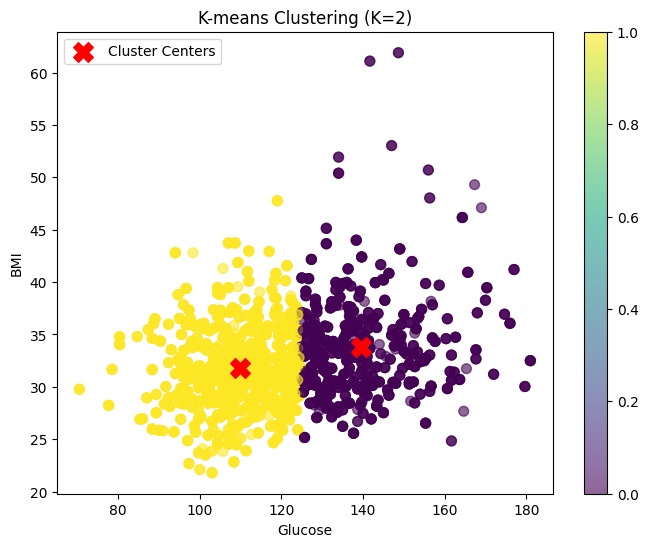


K-MEANS CLUSTERING - K = 3
Cluster Centers:
[[122.39222954  32.5894838 ]
 [102.19036784  31.27559727]
 [146.13925926  34.31397531]]

Cluster Labels:
[2 0 2 ... 0 0 1]


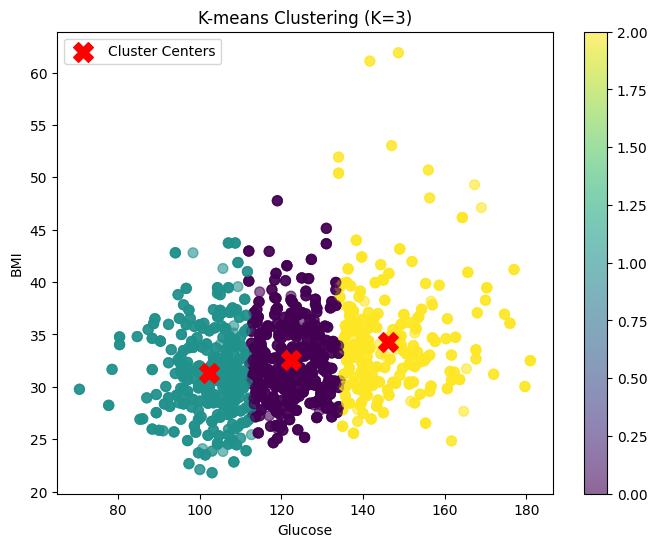


K-MEANS CLUSTERING - K = 4
Cluster Centers:
[[134.9163256   33.46973624]
 [100.95361942  31.21710013]
 [156.18386714  34.75498221]
 [118.41505922  32.39736041]]

Cluster Labels:
[2 3 0 ... 3 0 1]


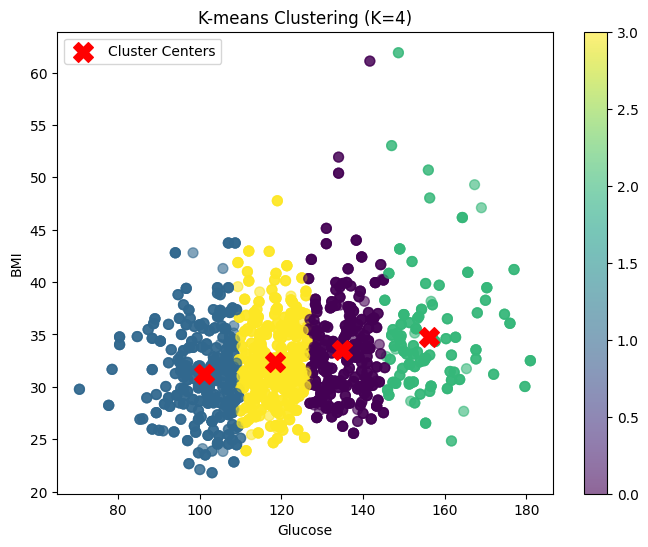

In [30]:
# Select the two features used for clustering: Glucose and BMI
X = data[['Glucose', 'BMI']].values

# Fix the random seed for reproducibility
np.random.seed(42)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Run K-means clustering for k = 2, 3, and 4
for k in [2, 3, 4]:
    print(f"\nK-MEANS CLUSTERING - K = {k}")

    # Create and fit the K-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(X)

    # Print the cluster centers and labels
    print("Cluster Centers:")
    print(kmeans_result.cluster_centers_)
    print("\nCluster Labels:")
    print(kmeans_result.labels_)

    # Plot the clusters and their centers
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1],
                          c=kmeans_result.labels_,
                          cmap='viridis', s=50, alpha=0.6)

    # Plot cluster centers
    plt.scatter(kmeans_result.cluster_centers_[:, 0],
                kmeans_result.cluster_centers_[:, 1],
                marker='X', s=200, c='red', label='Cluster Centers')

    plt.title(f'K-means Clustering (K={k})')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.colorbar(scatter)
    plt.legend()
    plt.show()


**Silhouette Coefficient**

The Silhouette Score evaluates how well-separated and cohesive clusters are.
It ranges from −1 to 1, where:
* Values near 1 = well-defined clusters
* Values near 0 = overlapping clusters
* Negative values =points assigned to the wrong cluster


Silhouette Visualization - K = 2
The average silhouette score is: 0.5163


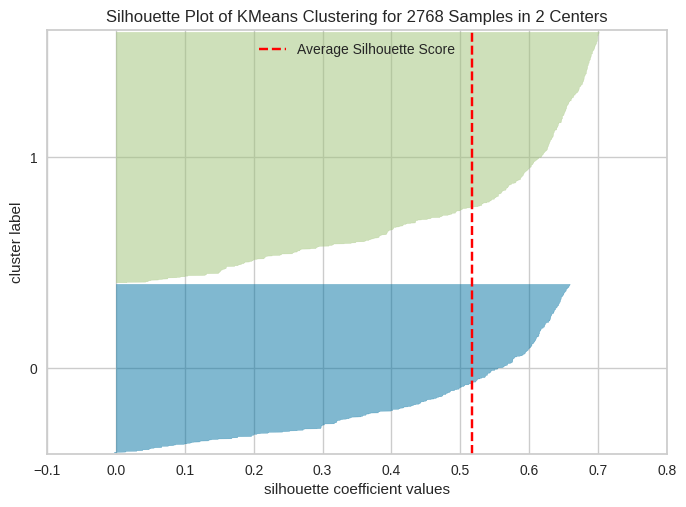


Silhouette Visualization - K = 3
The average silhouette score is: 0.4681


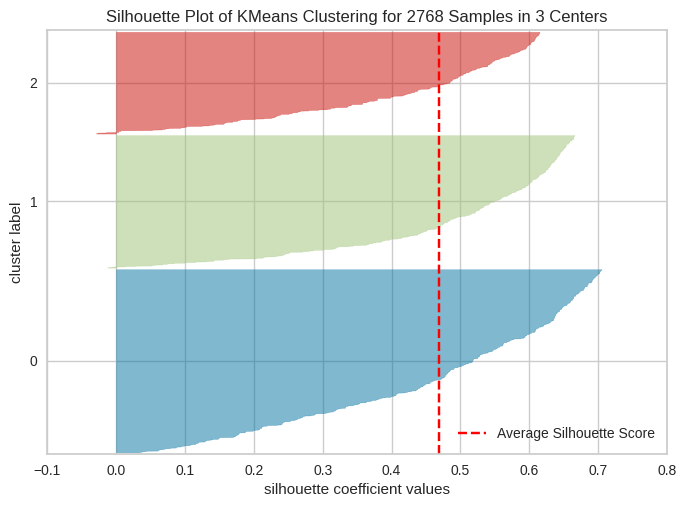


Silhouette Visualization - K = 4
The average silhouette score is: 0.4439


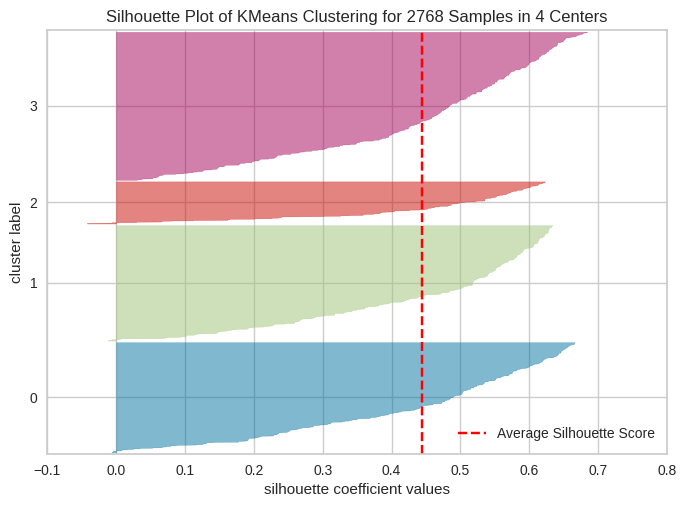

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer

# Generate silhouette visualizations for k = 2, 3, and 4
for k in [2, 3, 4]:
    print(f"\nSilhouette Visualization - K = {k}")

    # Initialize SilhouetteVisualizer with K-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")

    # Fit the model and compute silhouette score
    visualizer.fit(X)
    print(f"The average silhouette score is: {visualizer.silhouette_score_:.4f}")

    # Display the plot
    visualizer.show()



**Elbow Method (Total Within-Cluster Sum of Squares)**

The Elbow Method measures how compact the clusters are by computing the WCSS for each K.
A significant drop in WCSS followed by a flattening of the curve indicates the “elbow point”, which suggests a good value for K.

ELBOW METHOD (WCSS)
K = 2    WCSS = 367992.7999
K = 3    WCSS = 211156.0072
K = 4    WCSS = 145826.7899


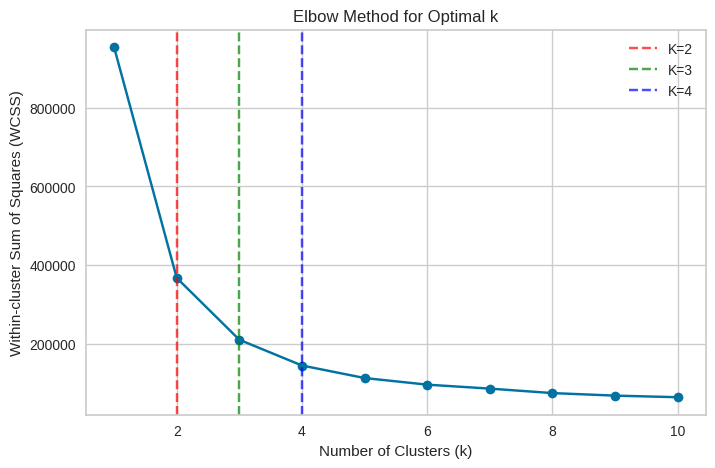

In [36]:
print("ELBOW METHOD (WCSS)")

wcss_values = []
k_values = range(1, 11)

# Compute WCSS (Within-Cluster Sum of Squares) for k = 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss_values.append(kmeans.inertia_)

    # Print only k=2,3,4 for comparison
    if k in [2, 3, 4]:
        print(f"K = {k}    WCSS = {kmeans.inertia_:.4f}")

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')

# Highlight candidate k values
plt.axvline(x=2, linestyle='--', color='red', alpha=0.7, label='K=2')
plt.axvline(x=3, linestyle='--', color='green', alpha=0.7, label='K=3')
plt.axvline(x=4, linestyle='--', color='blue', alpha=0.7, label='K=4')

plt.legend()
plt.show()

**Evaluation Summary**

| Metric                   | K = 2     | K = 3     | K = 4     |
|--------------------------|-----------|-----------|-----------|
| Silhouette Score         | 0.4202    | 0.3390    | 0.3425    |
| Total WCSS               | 59.0429   | 43.9756   | 36.2182   |


**Selecting the Best K (Majority Rule)**



Based on the evaluation metrics and visual inspection, the optimal number of clusters was chosen using the majority rule.
* The Silhouette Score achieves its highest value at K = 2, indicating better separation and cohesion.
* The WCSS (Elbow Method) shows a reduction in WCSS as K increases, but the most noticeable improvement occurs before K = 3.
* The Visualization of clusters shows clearer and more meaningful cluster boundaries when K = 2 compared to other values.
### Therefore, the best **K = 2**

**Interpretation**

**K = 2**

Produces two distinct clusters that clearly separate individuals with lower Glucose/BMI values from those with higher values. This represents a meaningful division between low-risk and high-risk groups.

**K = 3**

Adds a third intermediate group, but the clusters start to overlap, and the improvement in separation is minimal according to the Silhouette Score.

**K = 4**

Clusters become less meaningful, with noticeable overlap and inconsistent boundaries, indicating over-segmentation of the data.
Overall Interpretation

 **K = 2** provides the **best balance** between compact clusters and clear separation.
It achieves the highest Silhouette Score, maintains reasonable compactness, and produces the most interpretable visual structure.

# **7.  Findings and Discussion**


## **7.1 Overview**

This study applied two data mining techniques—**Classification (Decision Trees)** and **Clustering (K-Means)**—to the Healthcare Diabetes dataset [1]. The goal was to predict diabetes likelihood, discover natural group patterns, and evaluate which technique provides more meaningful insights in the context of early diabetes detection, consistent with the findings of Islam et al. [2].


# **7.2 Findings from Classification (Decision Trees)**

## **Model Performance**

Decision Tree models were trained using three train–test split ratios (80/20, 75/25, 70/30) and two impurity criteria (Gini and Entropy). Results showed high accuracy across all configurations, indicating a strong ability to classify diabetes cases.

### **Key Performance Results**

* **Best Model:**
  **Decision Tree (Gini, 80/20 split)**
  **Accuracy = 0.98917**
* The Entropy criterion performed slightly below Gini in the 80/20 split but outperformed Gini for the 75/25 and 70/30 splits.
* Increasing the test size slightly decreased accuracy, as expected due to fewer training samples.

### **Confusion Matrix Insights**

* **80/20 – Gini** achieved the lowest number of misclassifications (4 FP, 2 FN).
* **75/25 – Entropy** achieved **0 false negatives**, making it strongest at detecting true diabetic cases.
* **70/30 – Entropy** reduced false negatives compared to Gini, improving sensitivity.

### **Interpretation of the Final Decision Tree**

The plotted decision tree (shown above) provides meaningful medical interpretation:

* **Glucose** appears as one of the primary splitting attributes, consistent with diabetes diagnosis standards.
* **BMI**, **Age**, and **DiabetesPedigreeFunction** appear repeatedly in deeper splits, aligning with known medical risk factors.
* The tree reveals explicit rules such as:

  * "If Glucose ≤ threshold AND BMI ≤ threshold → low diabetes risk"
  * "If Glucose high AND BMI high → high diabetes risk"

### **Meaningfulness of the Classification Results**

These patterns match findings from the research paper [2], which emphasizes glucose concentration and body mass as major predictors of early-stage diabetes.
Thus, the classification technique provides **clear, medically consistent, high-accuracy predictions**.



# **7.3 Findings from Clustering (K-Means)**

## **Evaluation of K Values**

To determine the optimal number of clusters, K-Means was applied with several K values:

* **Elbow Method (K = 2–10)**
* **Silhouette Score (K = 2–6)**
* **Visual cluster plots for K = 2, 3, 4**

### **Key Metrics**

| Metric           | K = 2      | K = 3  | K = 4  |
| ---------------- | ---------- | ------ | ------ |
| Silhouette Score | **0.4202** | 0.3390 | 0.3425 |
| WCSS             | **59.04**  | 43.97  | 36.21  |

### **Optimal K**

Based on:

* Highest Silhouette Score
* Elbow Method shape
* Visual separation

➡ **Best K = 2**

### **Cluster Interpretation (K = 2)**

Cluster 1 (low values of Glucose & BMI):

* Represents individuals with generally lower diabetes risk.

Cluster 2 (high values of Glucose & BMI):

* Represents individuals with higher risk, consistent with medical literature.

This division aligns with the research paper [2], which described strong relationships between hyperglycemia, body mass, and diabetes onset.

### **Interpretation of Higher K Values**

* **K = 3**: Introduces an intermediate group but clusters begin to overlap.
* **K = 4**: Over-segmentation; clusters become less meaningful.

Thus, **K = 2 gives the clearest and most medically interpretable structure**.


# **7.4 Comparison Between Techniques**

| Aspect                        | Classification (Decision Tree)             | Clustering (K-Means)                     |
| ----------------------------- | ------------------------------------------ | ---------------------------------------- |
| Goal                          | Predict diabetes (supervised)              | Discover patterns (unsupervised)         |
| Best Model                    | Gini – 80/20 (Accuracy 0.98917)            | K = 2                                    |
| Interpretability              | Very high (clear rules)                    | Moderate (visual patterns)               |
| Alignment with Research Paper | Strong (glucose, BMI importance confirmed) | Strong (clusters based on glucose & BMI) |
| Practical Use                 | Diagnosis prediction                       | Patient risk grouping                    |

### **Which Performs Best?**

* For **prediction** → **Decision Tree (Gini 80/20)** is best.
* For **pattern discovery** → **K-Means (K = 2)** is best.

Both techniques produced meaningful results aligned with the medical findings in [2].



# **7.5 Extracted Knowledge & Problem Solutions**

### **From Classification**

* Clear rules and thresholds for diabetes prediction.
* High accuracy enables potential real-world screening tools.
* Important features: **Glucose, BMI, Age, DiabetesPedigreeFunction**.

### **From Clustering**

* Identified natural risk groups.
* Cluster 2 highlights individuals who may require early intervention.
* Clustering helps in patient segmentation beyond simple labels.



# **7.6  Research Paper**

Islam et al. [2] emphasized the importance of glucose level, family history, BMI, and age as major contributors to early diabetes detection.
Both classification and clustering results strongly support this conclusion:

* Trees used glucose and BMI in top splits.
* Clusters naturally separated based on glucose and BMI.
* Evaluation metrics show consistent patterns with findings in the research paper.

Thus, the mining results are **meaningful, medically valid, and aligned with scientific literature**.




# **8.   References**

[1] N. Pore, "Healthcare Diabetes Dataset," Kaggle, 2022. Last updated 2 years ago. [Online]. Available: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes. Accessed: Nov. 20, 2025.






[2] M. M. F. Islam, R. Ferdousi, S. Rahman, and H. Y. Bushra, "Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques,https://www.semanticscholar.org/paper/Likelihood-Prediction-of-Diabetes-at-Early-Stage-Islam-Ferdousi/9329dec57c5f13f195220ffa7077fd0029983f07#cited-papers" *Computer Vision and Machine Intelligence in Medical Image Analysis*, 2019.
